In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 as pg
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as datetime
from time import strptime
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn import preprocessing
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [2]:
username = "postgres"
password = "ruchi204"


connection = pg.connect(dbname = "postgres",
                                      user = username,
                                      password = password,
                                      host = "127.0.0.1",
                                      port = "5432")

In [3]:
cursor = connection.cursor()

print ( connection.get_dsn_parameters(),"\n")

cursor.execute("SELECT version();")
record = cursor.fetchone()
print("You are connected to - ", record,"\n")

{'user': 'postgres', 'dbname': 'postgres', 'host': '127.0.0.1', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 10.9, compiled by Visual C++ build 1800, 64-bit',) 



pathname = "C:/Users/venka/Documents/Bujjy/Georgetown Data Science/Capstone Data"
#combine all files in the list
all_filenames = [f"{pathname}/Weather Data 2017.csv", f"{pathname}/Weather Data 2018.csv"]

combined_wthr = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_wthr.to_csv(f"{pathname}/combined_wthr.csv", index=False, encoding='utf-8-sig')

combined_wthr.tail()

In [4]:
#def load_data()C:/Users/venka/Documents/Bujjy/Georgetown Data Science/Capstone Data
injury_data = pd.read_csv("C:/Users/venka/Documents/Bujjy/Georgetown Data Science/Capstone Data/wrangled_injury._withcounties.csv", 
                          sep=',', usecols=["UPA", "EventDate", "State", "NAMELSAD", "Month", "InsideUS", "Event","Source","Primary NA","Part of Bo","Nature", "Amputation", "Hospitaliz"])

parse_dates = ['EVENTDATE']

injury_data.tail(10)

#weather_data = pd.read_csv("C:/Users/venka/Documents/Bujjy/Georgetown Data Science/Capstone Data/combined_csv.csv", sep=',',usecols=["ZIPCODE","EVENTDATE","EVENTCODE"], dtype={'ZIPCODE': float, 'EVENTDATE': str,'EVENTCODE': str}, parse_dates=parse_dates)

#injury_data.head(10)

#weather_data.head(10)

#injury_merge= pd.merge(left=injury_data,right=weather_data,how='left', left_on=['EVENTDATE','Zip'], right_on=['EVENTDATE','ZIPCODE'])

#injury_merge=injury_merge.astype(dtype = {"EVENTDATE":"datetime64"}, inplace="true")
                       




c:\program files\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UPA,EventDate,State,Primary NA,Hospitaliz,Amputation,Nature,Part of Bo,Event,Source,NAMELSAD,Month,InsideUS
39825,1339236,2018-05-17,FLORIDA,561730,1,1.0,1311,4422,642,483,NaN,5,0
39826,1358531,2018-07-09,TEXAS,213112,1,1.0,1311,4422,640,8621,NaN,7,0
39827,1357235,2018-07-10,ALASKA,445220,0,1.0,1311,4422,6411,3719,NaN,7,0
39828,1374080,2018-08-22,WEST VIRGINIA,237120,1,0.0,194,310,2731,8423,NaN,8,0
39829,1375142,2018-08-24,TEXAS,213112,1,1.0,1311,4429,6252,7125,NaN,8,0
39830,1376166,2018-08-25,TEXAS,928110,1,0.0,111,52,4334,6521,NaN,8,1
39831,1384824,2018-09-19,TEXAS,213112,1,0.0,1510,513,5544,10,NaN,9,0
39832,1388899,2018-10-04,COLORADO,713920,1,0.0,111,899,4314,3489,NaN,10,0
39833,1392712,2018-10-17,FLORIDA,238990,1,0.0,111,899,4332,6540,NaN,10,1
39834,1416176,2018-10-26,WEST VIRGINIA,561311,1,0.0,194,330,620,4120,NaN,10,0


In [5]:
injury_data['Hospitaliz'].value_counts()

injury_data['NAMELSAD'].isna().sum()

injury_data['Amputation'].value_counts()

injury_data.dropna(how='any',inplace=True)


In [6]:
injury_data['NAMELSAD'].isna().sum()

0

In [7]:
injury_data['InsideUS'].value_counts()

1    39755
0       28
Name: InsideUS, dtype: int64

In [8]:
injury_data= injury_data[(injury_data['Hospitaliz'] == 0)|(injury_data['Hospitaliz'] ==1)]

injury_data= injury_data[(injury_data['Amputation'] == 0.0)|(injury_data['Amputation'] ==1.0)]

injury_data= injury_data[(injury_data['InsideUS'] == 1)]

injury_data['Amputation'].value_counts()

0.0    28910
1.0    10573
Name: Amputation, dtype: int64

In [9]:
injury_data['InsideUS'].value_counts()

1    39483
Name: InsideUS, dtype: int64

In [10]:
injury_data.drop(['InsideUS'], axis=1,inplace=True)

In [11]:
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39483 entries, 1 to 39786
Data columns (total 12 columns):
UPA           39483 non-null int64
EventDate     39483 non-null object
State         39483 non-null object
Primary NA    39483 non-null object
Hospitaliz    39483 non-null int64
Amputation    39483 non-null float64
Nature        39483 non-null int64
Part of Bo    39483 non-null int64
Event         39483 non-null int64
Source        39483 non-null int64
NAMELSAD      39483 non-null object
Month         39483 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 3.9+ MB


In [14]:
#injury_data['UPA'].is_unique

#injury_data.set_index('UPA', inplace=True)

#injury_data = injury_data.fillna('')

#injury_data.rename(columns={'Primary NAICS':'Primary_NAICS','Final Narrative':'Final_Narrative','Part of Body':'Part_Of_Body','Part of Body Title':'Part_Of_Body_Title','Secondary Source':'Secondary_Source','Secondary Source Title':'Secondary_Source_Title'}, inplace=True)

#injury_data.head(10)
#
#for col in injury_data.columns:

    #print("The column name is", col, "and the type is", injury_data[col].dtype, sep="--")
    
#injury_data=injury_data.astype(dtype = {"UPA":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"EventDate":"datetime64"}, inplace=True)
        
injury_data=injury_data.astype(dtype = {"State":"str"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Primary NA":"str"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Hospitaliz":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Amputation":"str"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Nature":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Part of Bo":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Event":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Source":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"NAMELSAD":"str"}, inplace=True)
injury_data=injury_data.astype(dtype = {"Month":"str"}, inplace=True)
#injury_data=injury_data.astype(dtype = {"InsideUS":"int64"}, inplace=True)
    

#print(injury_data["InsideUS"].dtype)


injury_data.shape

injury_data.tail()
    

,UPA,EventDate,State,Primary NA,Hospitaliz,Amputation,Nature,Part of Bo,Event,Source,NAMELSAD,Month
39782,1216201,2017-05-17,WEST VIRGINIA,491110,1,0.0,1720,6,531,9262,Wayne County,5
39783,1244626,2017-07-24,WEST VIRGINIA,237310,1,0.0,111,513,629,3259,Wayne County,7
39784,1359071,2018-07-13,WEST VIRGINIA,238110,1,0.0,132,130,6252,7224,Wayne County,7
39785,1359510,2018-07-16,WEST VIRGINIA,491110,1,0.0,1729,6,531,9262,Wayne County,7
39786,1360237,2018-07-17,WEST VIRGINIA,541990,1,0.0,111,135,6241,4120,Wayne County,7


In [15]:
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39483 entries, 1 to 39786
Data columns (total 12 columns):
UPA           39483 non-null int64
EventDate     39483 non-null datetime64[ns]
State         39483 non-null object
Primary NA    39483 non-null object
Hospitaliz    39483 non-null int64
Amputation    39483 non-null object
Nature        39483 non-null int64
Part of Bo    39483 non-null int64
Event         39483 non-null int64
Source        39483 non-null int64
NAMELSAD      39483 non-null object
Month         39483 non-null object
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 3.9+ MB


In [16]:
le = preprocessing.LabelEncoder()
injury_data['State'] = le.fit_transform(injury_data.State.values)

injury_data['NAMELSAD'] = le.fit_transform(injury_data.NAMELSAD.values)

injury_data['Amputation'] = le.fit_transform(injury_data.Amputation.values)

injury_data['Month'] = le.fit_transform(injury_data.Month.values)

injury_data['Primary NA'] = le.fit_transform(injury_data.Month.values)

#injury_data.apply(preprocessing.LabelEncoder().fit_transform(injury_data['Amputation']))

(39483, 9)
(39483, 1)


c:\program files\python37\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\linear_model\ridge.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


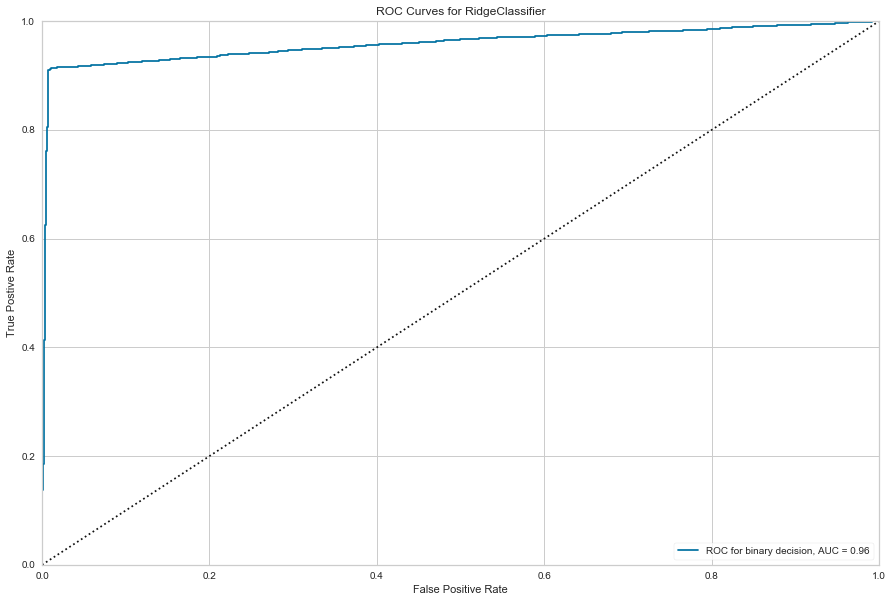

In [17]:
#X = injury_data[["NAMELSAD", "Month", "InsideUS", "Event","Source","Primary NA","Part of Bo","Nature", "Amputation", "Hospitaliz"]].values

#injury_data.isnull().values.any()



X = injury_data[["State","Source","Part of Bo","Nature","NAMELSAD","Amputation","Month","Primary NA","Event"]].values
#X = X.fillna('')

y = injury_data[["Hospitaliz"]].values

print(X.shape)

print(y.shape)

#y = y.fillna('')

oenc = OrdinalEncoder()
oenc.fit_transform(X)
yoenc = LabelEncoder()
yoenc.fit_transform(y)

#X = OrdinalEncoder().fit_transform(X)
#y = LabelEncoder().fit_transform(y)


#classes = ["0", "1"]
 


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

visualizer = ROCAUC(
    RidgeClassifier(), micro=False, macro=False, per_class=False, size=(1080, 720))

#fpr, tpr, thresholds = metrics.roc_auc_score(X, y)
#metrics.auc(fpr, tpr)

#bayes = GaussianNB()
#visualizer = ClassificationReport(bayes, support=True, size=(1080, 720))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

# Specify the target classes
#classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
#visualizer = RadViz(size=(1080, 720))

#visualizer.fit(X, y)           # Fit the data to the visualizer
#visualizer.transform(X)        # Transform the data
#visualizer.poof()              # Draw/show/poof the data


In [ ]:
print(injury_data["EVENTDATE"].dtype)
months_map = {1: 'Jan',2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7: 'Jul', 8: 'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
def mapper(month):
    return months_map[month]

mapper(1)

injury_data['month'] = pd.DatetimeIndex(injury_data['EVENTDATE']).month
injury_data['month'] = injury_data['month'].apply(lambda x: mapper(x))
injury_data['month'].unique()
injury_data.head(10)
    

In [ ]:
sns.pairplot(injury_data, x_vars='Zip', y_vars=['Nature','EVENTDATE'],diag_kind='kde')
             #hue='Zip', diag_kind="EVENTDATE", height=3)
#sns.jointplot("EVENTDATE","Zip",data=injury_data,kind='reg',height=12)

In [ ]:
#pd.plotting.scatter_matrix(injury_data,figsize=(15,15),marker='0',hist_kwds={'bins': 20}, s=60, alpha=.8)

pd.plotting.scatter_matrix(injury_data, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()